In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
#create the dataset

X,y = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state= 15)

In [5]:
X

array([[-0.3779567 ,  1.04389498,  1.04349443, ..., -0.0671922 ,
         0.17547148, -1.04964564],
       [-0.32525851,  1.27626282, -0.68612327, ...,  1.00663329,
        -0.83369182,  0.95774417],
       [ 0.73901891, -0.60090284, -0.17729436, ..., -0.21898072,
         0.87864296, -1.25774001],
       ...,
       [ 0.67556288, -0.53841971, -1.29950008, ...,  2.04333597,
         0.94738793,  0.79035376],
       [ 2.62971021, -2.45289885, -1.35978523, ...,  0.37889809,
        -1.97189411, -0.2522504 ],
       [-1.79149103, -0.12190773,  0.53515332, ..., -1.94135733,
         0.58900166, -1.00748218]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [7]:
logistic = LogisticRegression()

In [8]:
logistic.fit(X_train, y_train)

LogisticRegression()

In [9]:
y_pred = logistic.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1
 0 1 0 0]


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

0.9166666666666666
[[146  11]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       157
           1       0.92      0.90      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



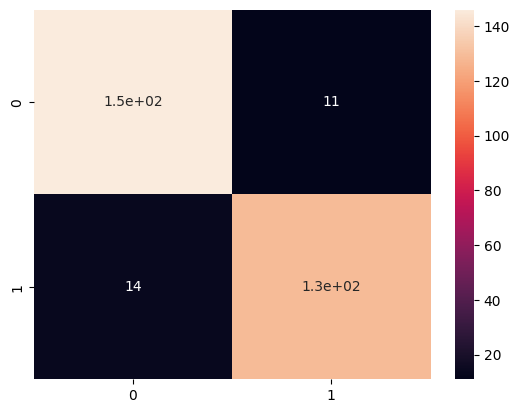

In [11]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
print(classification_report(y_test, y_pred))

# Hyperparameter tuning and Cross validation

In [12]:
model = LogisticRegression()
# Parameter grid with valid combinations
param_grid = [
    {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'sag']},
    {'penalty': ['l1'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['liblinear', 'saga']},
    {'penalty': ['elasticnet'], 'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ['saga'], 'l1_ratio': [0.5, 0.7]}
]

In [13]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, scoring = 'accuracy', n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

In [14]:
# Best parameters
print("Best parameters:", grid_result.best_params_)
print("Best accuracy:", grid_result.best_score_)

Best parameters: {'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Best accuracy: 0.927142857142857


In [15]:
y_pred = grid_result.predict(X_test)

0.92
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



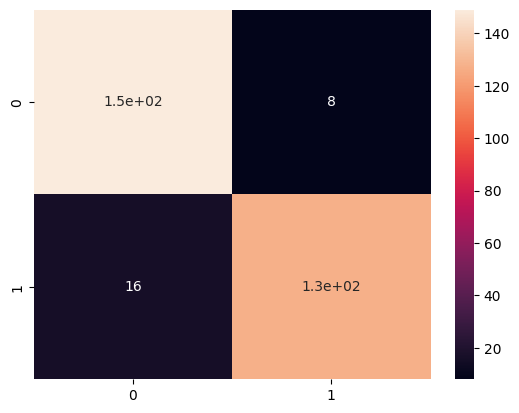

In [16]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
print(classification_report(y_test, y_pred))

# Randomized Search CV

In [17]:
from sklearn.model_selection import RandomizedSearchCV

In [18]:
random = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
random_result = random.fit(X_train, y_train)

In [19]:
print("Best parameters:", random_result.best_params_)
print("Best accuracy:", random_result.best_score_)

Best parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best accuracy: 0.9228571428571428


In [20]:
y_pred = random_result.predict(X_test)

0.9266666666666666
[[150   7]
 [ 15 128]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       157
           1       0.95      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



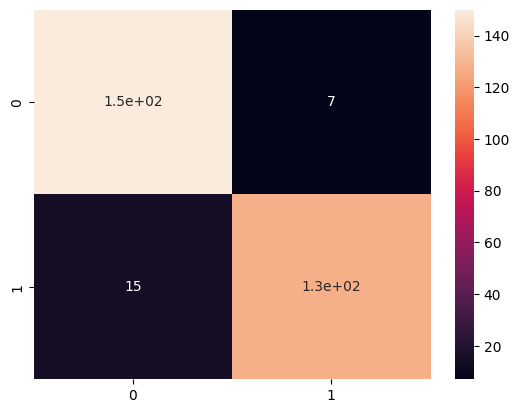

In [21]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
print(classification_report(y_test, y_pred))

# Logistic OVR

In [22]:
X,y = make_classification(n_samples = 1000, n_features = 10, n_classes = 4, n_informative = 4, random_state= 15)

In [23]:
y

array([3, 0, 0, 2, 3, 0, 0, 2, 3, 1, 3, 2, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1,
       1, 3, 0, 1, 3, 3, 2, 1, 3, 3, 3, 2, 3, 3, 2, 3, 0, 3, 1, 0, 0, 3,
       0, 3, 3, 0, 0, 1, 3, 1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 0, 2, 3, 0, 0,
       2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 3, 3, 2, 2, 2, 1, 0, 3, 3, 0,
       3, 2, 1, 0, 0, 2, 3, 0, 3, 2, 2, 0, 0, 0, 0, 3, 3, 1, 3, 3, 2, 0,
       2, 2, 2, 1, 2, 1, 1, 3, 3, 0, 0, 2, 3, 3, 0, 2, 3, 3, 2, 0, 1, 3,
       0, 1, 2, 3, 2, 1, 1, 1, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 1,
       1, 0, 0, 1, 2, 1, 0, 1, 3, 0, 3, 2, 0, 0, 2, 2, 3, 2, 2, 3, 0, 1,
       1, 3, 1, 3, 2, 3, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2,
       1, 3, 2, 0, 3, 3, 1, 3, 3, 2, 0, 3, 1, 1, 2, 0, 3, 2, 0, 2, 3, 0,
       3, 1, 3, 0, 0, 1, 1, 3, 1, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3, 0, 1, 1,
       2, 1, 1, 3, 2, 0, 2, 0, 1, 3, 2, 0, 3, 2, 3, 3, 0, 0, 1, 1, 2, 1,
       0, 3, 0, 1, 2, 3, 2, 2, 2, 0, 0, 2, 2, 3, 0, 3, 3, 0, 0, 3, 3, 2,
       3, 1, 3, 3, 0, 1, 0, 2, 3, 2, 0, 1, 1, 2, 0,

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [25]:
lregr = LogisticRegression(multi_class='ovr')
lregr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [26]:
y_pred = lregr.predict(X_test)

0.5666666666666667
[[40 22  2 12]
 [ 6 53 15  1]
 [ 7 15 34 17]
 [16  0 17 43]]
              precision    recall  f1-score   support

           0       0.58      0.53      0.55        76
           1       0.59      0.71      0.64        75
           2       0.50      0.47      0.48        73
           3       0.59      0.57      0.58        76

    accuracy                           0.57       300
   macro avg       0.56      0.57      0.56       300
weighted avg       0.56      0.57      0.56       300



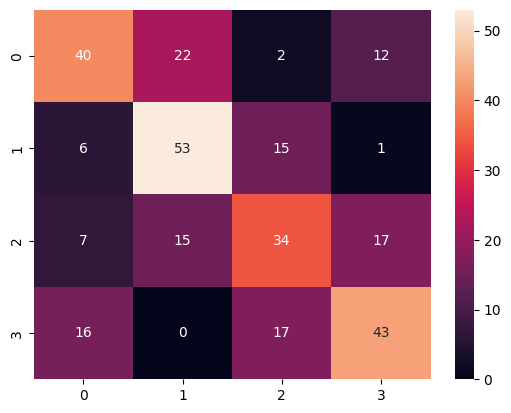

In [27]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
print(classification_report(y_test, y_pred))

In [28]:
grid = GridSearchCV(estimator = lregr, param_grid = param_grid, cv = cv, scoring = 'accuracy', n_jobs = -1)
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [29]:
print("Best parameters:", grid_result.best_params_)
print("Best accuracy:", grid_result.best_score_)

Best parameters: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Best accuracy: 0.6557142857142857


# Logistic for imbalanced dataset

In [30]:
# Generateand plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [31]:
## imbalanced dataset
X,y = make_classification(n_samples = 10000, n_features = 2, n_clusters_per_class = 1, n_redundant= 0,
                          weights=[0.99], random_state=10)

In [32]:
Counter(y)

Counter({0: 9846, 1: 154})

In [33]:
import seaborn as sns
import pandas as pd

<Axes: xlabel='0', ylabel='1'>

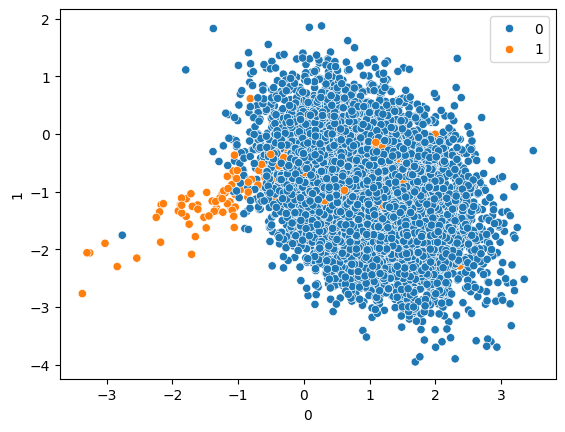

In [34]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [35]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [36]:
# Hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['liblinear', 'saga', 'lbfgs', 'newton-cg', 'sag']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
param_grid = dict(penalty = penalty, C = C, solver = solver, class_weight = class_weight)

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv, scoring = 'accuracy')
grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

In [38]:
print("Best parameters:", grid_result.best_params_)
print("Best accuracy:", grid_result.best_score_)

Best parameters: {'C': 0.1, 'class_weight': {0: 50, 1: 100}, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.9882666666666667


In [39]:
y_pred = grid_result.predict(X_test)

0.9896
[[2465    0]
 [  26    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2465
           1       1.00      0.26      0.41        35

    accuracy                           0.99      2500
   macro avg       0.99      0.63      0.70      2500
weighted avg       0.99      0.99      0.99      2500



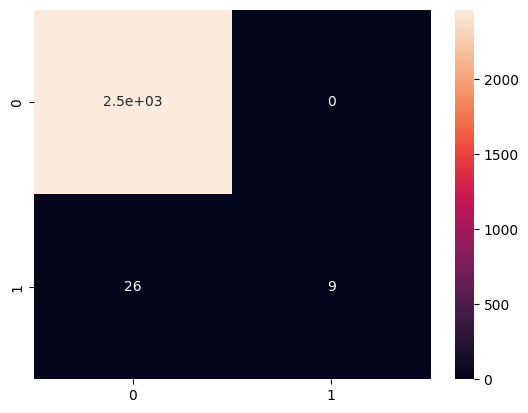

In [40]:
score = accuracy_score(y_test, y_pred)
print(score)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
print(classification_report(y_test, y_pred))

# Logistic with ROC curve and ROC AUC score

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
from matplotlib import pyplot

In [43]:
X,y = make_classification(n_samples = 10000, n_classes = 2, random_state = 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [45]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# fit a model
model = LogisticRegression()
model.fit(X_train, y_train)
# predict probabilities
lr_probs = model.predict_proba(X_test)

In [46]:
## focus on the positive outcome
model_prob = lr_probs[:,1]

In [47]:
dummy_model_auc = roc_auc_score(y_test, ns_probs)
print('No Skill AUC: %.3f' % (dummy_model_auc))
model_auc = roc_auc_score(y_test, model_prob)
print('Logistic AUC: %.3f' % (model_auc))

No Skill AUC: 0.500
Logistic AUC: 0.945


In [53]:
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

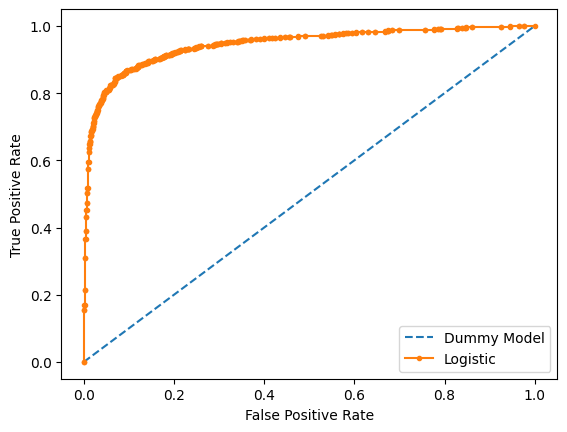

In [49]:
pyplot.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
pyplot.plot(model_fpr, model_tpr, marker='.', label='Logistic')
#axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
#show the legend
pyplot.legend()
#show the plot
pyplot.show()

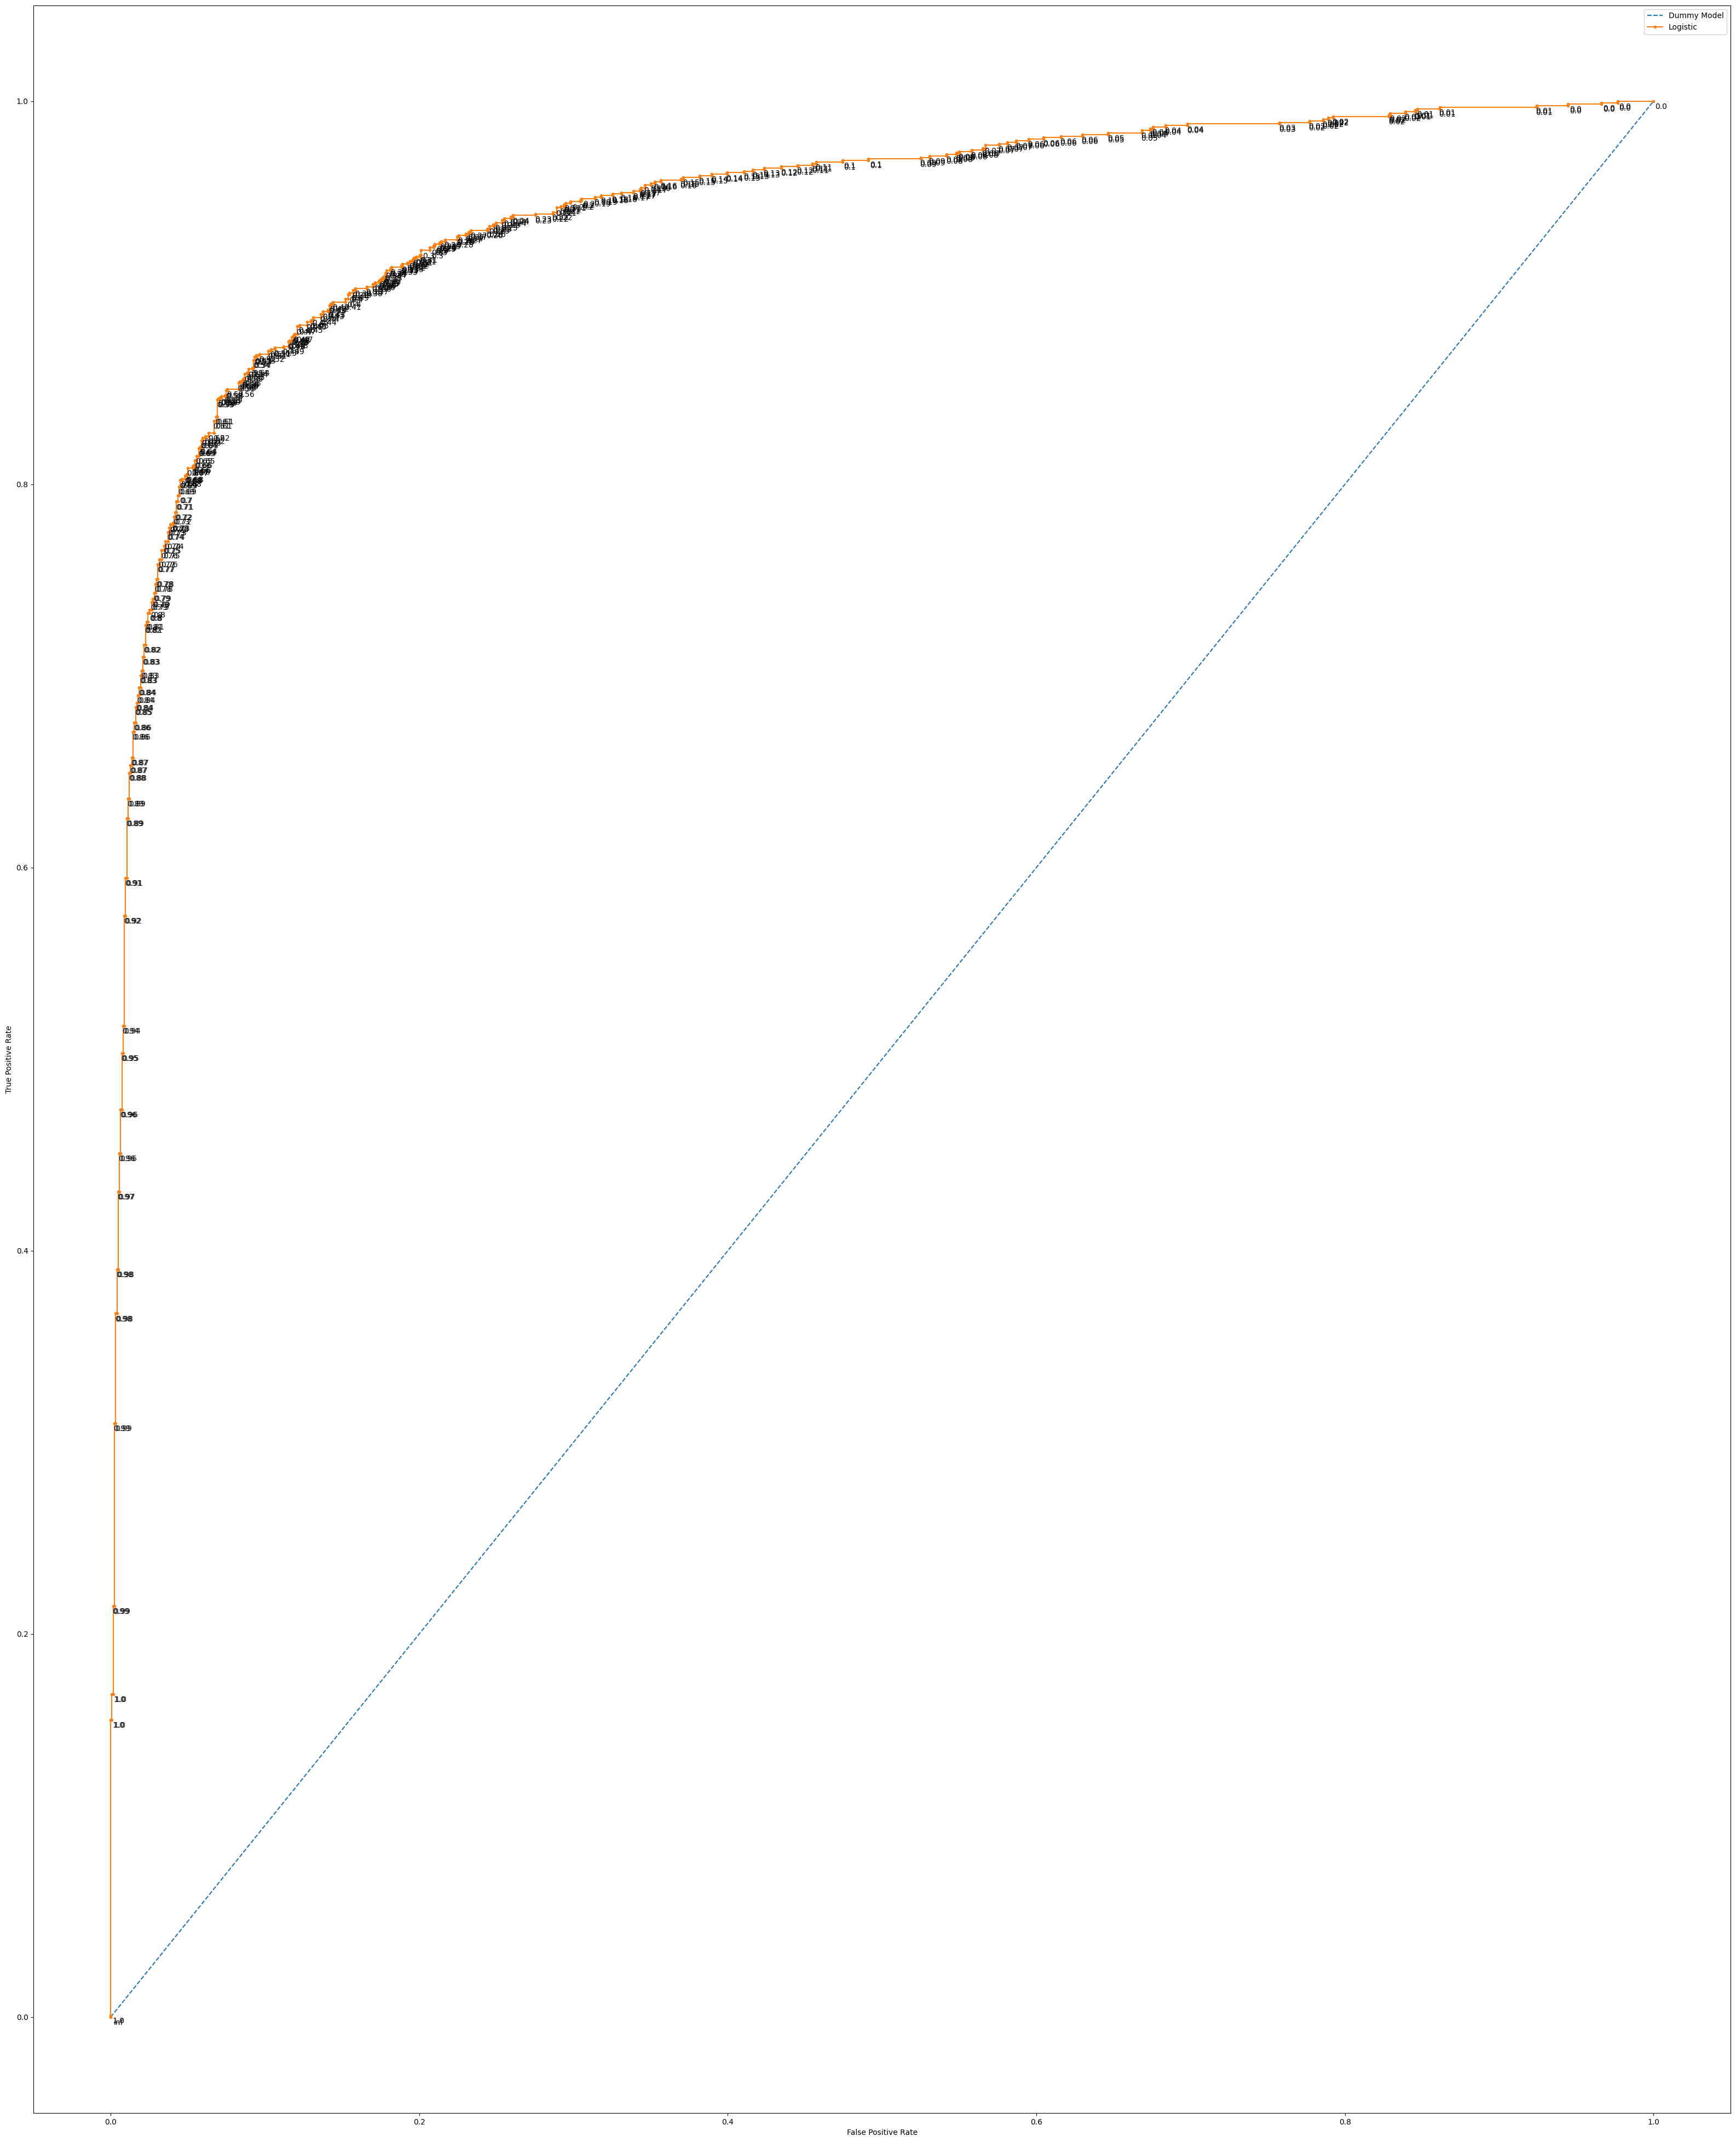

In [60]:
#plot the roc curve for the model
import numpy as np
# Create figure and axis
fig, ax = pyplot.subplots(figsize=(40, 50))  # Adjusted size for better display

# Plot curves
ax.plot(dummy_fpr, dummy_tpr, linestyle='--', label='Dummy Model')
ax.plot(model_fpr, model_tpr, marker='.', label='Logistic')

# Add annotations for thresholds
for fpr, tpr, threshold in zip(model_fpr, model_tpr, thresholds):
    ax.annotate(f'{np.round(threshold, 2)}', xy=(fpr, tpr),
                textcoords="offset points", xytext=(10, -10), ha='center')

# Axis labels and legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# Show the plot
pyplot.show()